## Load the CSV data

In [3]:
import pandas as pd

In [4]:
ZOO_DATA = '/home/torradeflot/Downloads/ZooSpecPhotoDR19_torradeflot.csv'

In [5]:
df = pd.read_csv(ZOO_DATA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659272 entries, 0 to 659271
Data columns (total 90 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   specobjid      659272 non-null  int64  
 1   objid          659272 non-null  int64  
 2   dr7objid       659272 non-null  int64  
 3   ra             659272 non-null  float64
 4   dec            659272 non-null  float64
 5   rastring       659272 non-null  object 
 6   decstring      659272 non-null  object 
 7   nvote          659272 non-null  int64  
 8   p_el           659272 non-null  float64
 9   p_cw           659272 non-null  float64
 10  p_acw          659272 non-null  float64
 11  p_edge         659272 non-null  float64
 12  p_dk           659272 non-null  float64
 13  p_mg           659272 non-null  float64
 14  p_cs           659272 non-null  float64
 15  p_el_debiased  659272 non-null  float64
 16  p_cs_debiased  659272 non-null  float64
 17  spiral         659272 non-nul

array([[<Axes: title={'center': 'p_el_debiased'}>]], dtype=object)

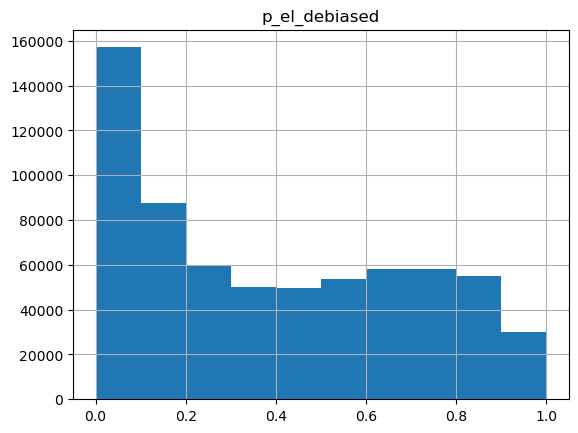

In [5]:
df[['p_el_debiased']].hist()

In [ ]:
df

In [16]:
(df[['p_el_debiased']] > 0.8).sum()

p_el_debiased    85276
dtype: int64

In [18]:
 (df[['p_cs_debiased']] > 0.8).sum()

p_cs_debiased    159021
dtype: int64

In [10]:
df[['objid', 'p_el_debiased', 'p_cs_debiased']].head(5)

,objid,p_el_debiased,p_cs_debiased
0,1237661463301455961,0.088,0.761
1,1237661463301456237,0.000,1.000
2,1237661463301521615,0.293,0.488
3,1237661463301521650,0.069,0.931
4,1237661463301587266,0.180,0.799


# Filter out incorrect data

In [19]:
m = (
    (df.modelMag_u >-30) & (df.modelMag_g > -30) & (df.modelMag_r > -30) & (df.modelMag_i > -30) & (df.modelMag_z > -30)
    & (df.modelMagErr_u < 0.5) & (df.modelMagErr_g < 0.05) & (df.modelMagErr_r < 0.05) & (df.modelMagErr_i < 0.05) & (df.modelMagErr_z < 0.1)
)

In [46]:
print(df.columns.to_list())

['specobjid', 'objid', 'dr7objid', 'ra', 'dec', 'rastring', 'decstring', 'nvote', 'p_el', 'p_cw', 'p_acw', 'p_edge', 'p_dk', 'p_mg', 'p_cs', 'p_el_debiased', 'p_cs_debiased', 'spiral', 'elliptical', 'uncertain', 'Column1', 'dr8objid', 'distance', 'modeDR7', 'modeDR8', 'skyVersion', 'run', 'rerun', 'camcol', 'field', 'obj', 'nChild', 'type', 'probPSF', 'insideMask', 'flags', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i', 'psfMagErr_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroMagErr_u', 'petroMagErr_g', 'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z', 'petroR50_r', 'petroR90_r', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', 'modelMagErr_z', 'mRrCc_r', 'mRrCcErr_r', 'lnLStar_r', 'lnLExp_r', 'lnLDeV_r', 'status', 'Column2', 'Column3', 'cx', 'cy', 'cz', 'primTarget', 'secTarget', 'extinction

In [20]:
len(df), len(df[m])

(659272, 654580)

In [64]:
df[m][['petroMagErr_u', 'petroMagErr_g', 'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z']].max()

petroMagErr_u    15329.530000
petroMagErr_g       90.876590
petroMagErr_r        3.518622
petroMagErr_i       86.490560
petroMagErr_z      265.656500
dtype: float64

array([[<Axes: title={'center': 'modelMagErr_u'}>,
        <Axes: title={'center': 'modelMagErr_g'}>],
       [<Axes: title={'center': 'modelMagErr_r'}>,
        <Axes: title={'center': 'modelMagErr_i'}>],
       [<Axes: title={'center': 'modelMagErr_z'}>, <Axes: >]],
      dtype=object)

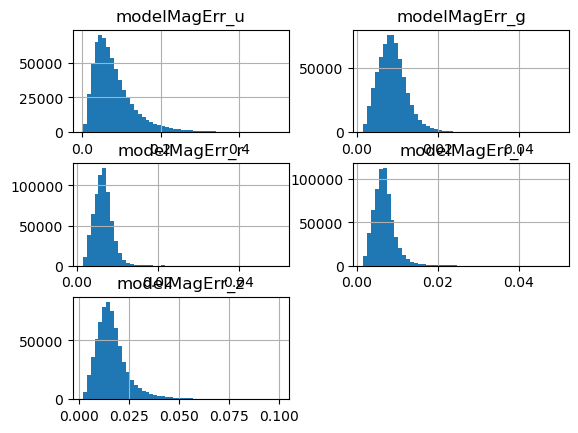

In [21]:
df[m][['modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i', 'modelMagErr_z']].hist(bins=50)

In [22]:
import matplotlib.pyplot as plt

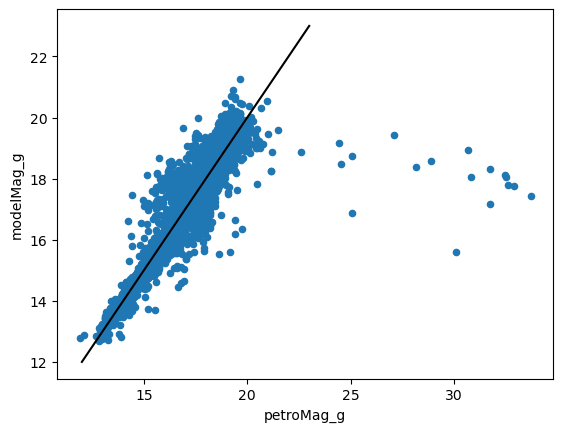

In [23]:
fig, ax = plt.subplots()
df[m].plot.scatter('petroMag_g', 'modelMag_g', ax=ax)
ax.plot([12, 23], [12, 23], 'k')

In [24]:
df[m].groupby('type').count()

,specobjid,objid,dr7objid,ra,dec,rastring,decstring,nvote,p_el,p_cw,...,secTarget,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,htmID,fieldID,Column4,size
type,,,,,,,,,,,,,,,,,,,,,
3,654580,654580,654580,654580,654580,654580,654580,654580,654580,654580,...,654580,654580,654580,654580,654580,654580,654580,654580,654580,654580


array([[<Axes: title={'center': 'petroR90_r'}>]], dtype=object)

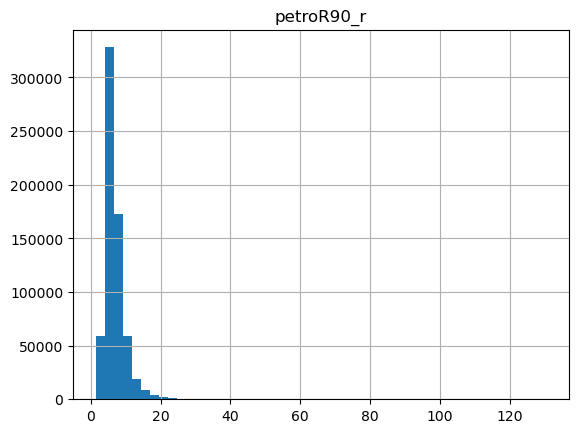

In [26]:
df[m][['petroR90_r']].hist(bins=50)